In [14]:
import sympy
import numpy as np
from sympy import Expr, Eq, latex, plot_implicit, Matrix, plot
from sympy import solve, linsolve, nonlinsolve, symbols, S
from sympy import Point, Line
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.geometry.entity import GeometryEntity, GeometrySet
import matplotlib.pyplot as plt
from IPython.display import Latex

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Кривые второго порядка на плоскости: парабола

## Парабола
геометрическое место точек, равноудалённых от данной прямой (называемой директрисой параболы) и данной точки (называемой фокусом параболы).
Каноническое уравнение параболы в прямоугольной системе координат:
\begin{align*}
y^{2} = 2px, p>0\quad
\mbox{или } x^{2} = 2py,\quad\mbox{если поменять местами оси}.
\end{align*}
Число $p$ называется фокальным параметром, оно равно расстоянию от фокуса до директрисы. Поскольку каждая точка параболы равноудалена от фокуса и директрисы, то и вершина — тоже, поэтому она лежит между фокусом и директрисой на расстоянии
$\frac{p}{2}$ от обоих.
### Пример 1
Построим параболы $y^{2} = 2px$ с $p = \frac12,\ 1, 2$, их директрисы.

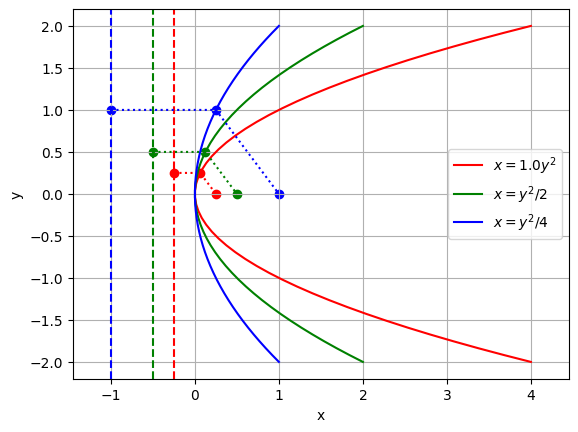

In [ ]:
from sympy.abc import x, y
def parabola_x(p, y):
    return y ** 2 / (2 * p)
ax = plt.gca()
Y = np.linspace(-2, 2)
for p, col in zip((S.Half, 1, 2),  ('r', 'g', 'b')):
    if round(p) != p:
        p = p.evalf()
    y0 = p / 2
    x0 = y0 ** 2 / (2 * p)
    points = ((-p / 2, x0, p / 2), (y0, y0, 0))
    ax.plot(parabola_x(p, Y), Y, color=col,
            label=sympy.latex(Eq(x, parabola_x(p, y)), mode='inline'))
    ax.axvline(x=-p / 2, color=col, linestyle='--')
    ax.scatter(*points, color=col)
    ax.plot(*points, col + ':')
ax.legend(loc='best')
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()

### Пример 2.
Изобразим на графике параболу $x^{2} = 2py$ и параболу, полученную из нее поворотом на угол 30 градусов.

Для поворота воспользуемся преобразованием координат в матричном виде:
\begin{align*}
X' = AX,\quad X = \left(\begin{matrix} x\\ y\end{matrix}\right),\quad X' = \left(\begin{matrix} x'\\ y'\end{matrix}\right),\\
A = \left(\begin{matrix}  \cos\alpha & -\sin\alpha\\ \sin\alpha & \cos\alpha\end{matrix}\right)
\end{align*}

Text(0, 0.5, 'y')

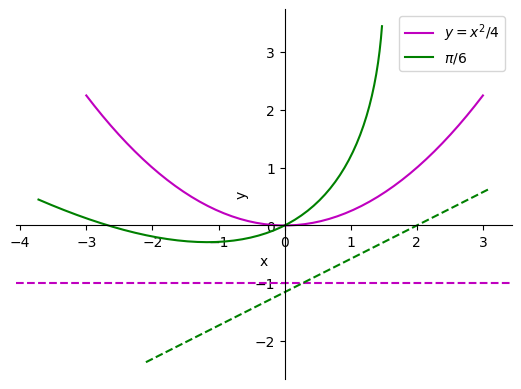

In [ ]:
from sympy.abc import x, y

def parabola_y(p, x):
    return x ** 2 / (2 * p)

p0 = 2
alpha = np.pi / 6
A = Matrix([[np.cos(alpha), - np.sin(alpha)],
            [np.sin(alpha), np.cos(alpha)]])
ax = plt.gca()
X = np.linspace(-3, 3)
Y = parabola_y(p0, X)
XY = Matrix((X, Y))
XY_new = A * XY
directrix = Matrix(([-3, 3],
                    [-p0 / 2, -p0 / 2]))
directrix_new = A * directrix
X1 = list(XY_new[0, :])
Y1 = list(XY_new[1, :])
directrixX1 = list(directrix_new[0, :])
directrixY1 = list(directrix_new[1, :])

ax.plot(X, Y, color='m', label=sympy.latex(Eq(y, parabola_y(p0, x)), mode='inline'))
ax.plot(X1, Y1, color='g', label=sympy.latex(sympy.pi/6, mode='inline'))
ax.axhline(y=-p0 / 2, color='m', linestyle='--')
ax.plot(directrixX1, directrixY1, color='g', linestyle='--')

ax.spines['right'].set_color('none') # Правая сторона рамки стала бесцветной, но не исчезла!
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0)) # Нижняя сторона рамки переместилась в начало координат
ax.spines['left'].set_position(('data', 0))

ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')

### Пример 3.
Составим уравнение параболы $y^{2} = 2px$, повернутой на угол $\pi/3$ против часовой стрелки.
Для этого составим матрицу поворота с тригонометрическими функциями из sympy, а также матрицу-столбец из выражения для $x$, соотвествующего уравнению параболы, и переменной $y$.
\begin{align*}
X' = AX,\quad X = \left(\begin{matrix} x\\ y\end{matrix}\right)
= \left(\begin{matrix} \frac{y^{2}}{2p}\\ y\end{matrix}\right),\quad X' = \left(\begin{matrix} x'\\ y'\end{matrix}\right),\\
A = \left(\begin{matrix}  \cos\alpha & -\sin\alpha\\ \sin\alpha & \cos\alpha\end{matrix}\right)
\end{align*}
Умножим матрицу-столбец на матрицу поворота, получим параметрические уравнения повернутой параболы, в роли параметра выступает $y$.
\begin{align*}
X' = \left(\begin{matrix} x'\\ y'\end{matrix}\right) = AX = \left(\begin{matrix}  \cos\alpha & -\sin\alpha\\ \sin\alpha & \cos\alpha\end{matrix}\right)\left(\begin{matrix} \frac{y^{2}}{2p}\\ y\end{matrix}\right)
\end{align*}


С помощью solve выразим  $y$ через $x'$ ($x'$ как в Примере 2, в нашем случае это первый элемент матрицы-столбца $AX$). Затем выражение $y$ через $x'$ подставим во второй элемент матрицы-столбца $AX$, получим выражение $y'$ через $x'$, т.е. уравнение повернутой параболы.

In [ ]:
x, y, p, x1, y1 = symbols('x y p x1 y1')
alpha_sympy = sympy.pi / 3
A_sympy = Matrix([[sympy.cos(alpha_sympy), - sympy.sin(alpha_sympy)],
                  [sympy.sin(alpha_sympy), sympy.cos(alpha_sympy)]])
X = Matrix((x, parabola_y(p, x)))
X_new = A_sympy * X
solution3_0 = nonlinsolve([Eq(x1, X_new[0]), Eq(y1, X_new[1])], x, y1)
solution3 = [sol[1].subs(x1, x) for sol in solution3_0]
equation3 = [Eq(y, item) for item in solution3]
display(*equation3)

Eq(y, 2*p/3 - sqrt(3)*x/3 - 2*sqrt(p*(p - 4*sqrt(3)*x))/3)

Eq(y, 2*p/3 - sqrt(3)*x/3 + 2*sqrt(p*(p - 4*sqrt(3)*x))/3)

### Пример 4.
Составим уравнение директрисы параболы $y^{2} = 2px$, повернутой на угол $\pi/3$ против часовой стрелки. Действия аналогичны Примеру 3, только матрица-столбец $X$ состоит из переменной $x$ и числа $-p/2$.

In [ ]:
x, y, p, x1, y1 = symbols('x y p x1 y1')
alpha_sympy = sympy.pi / 3
A_sympy = Matrix([[sympy.cos(alpha_sympy), - sympy.sin(alpha_sympy)],
                  [sympy.sin(alpha_sympy), sympy.cos(alpha_sympy)]])
X = Matrix((x, -p / 2))
X_new = A_sympy * X
solution4_0 = nonlinsolve([Eq(x1, X_new[0]), Eq(y1, X_new[1])], x, y1)
solution4 = [sol[1].subs(x1, x) for sol in solution4_0]
equation4 = [Eq(y, sol) for sol in solution4]
display(*equation4)

Eq(y, -p + sqrt(3)*x)

### Пример 5.
Построим график параболы, повернутой на угол $\pi/3$ градусов против часовой стрелки и ее директрису, уравнения параболы и директрисы включим в легенду. Используем уравнения, полученные в Примерах 3 и 4. Параметр $p$ положим равным 2.

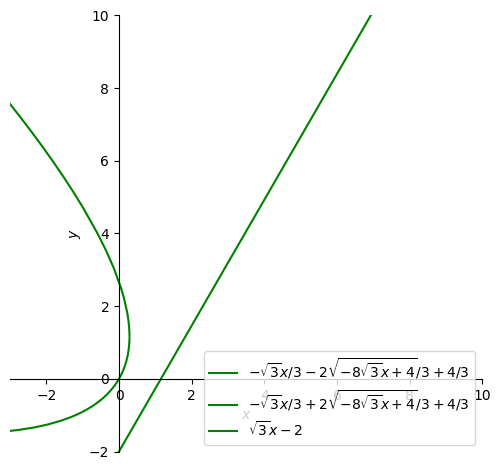

In [ ]:
p0 = plot(aspect_ratio=(1, 1),
                   axis_center=(0, 0),
                   xlim=(-3, 10),
                   ylim=(-2, 10),
                   xlabel='$x$', ylabel='$y$',
                   legend=True,
                   show=False)
for item in equation3 + equation4:
    Y = item.rhs.subs(p, 2)
    p0.extend(plot(Y,
                   aspect_ratio=(1, 1),
                   axis_center=(0, 0),
                   xlim=(-3, 10),
                   ylim=(-2, 10),
                   xlabel='$x$', ylabel='$y$', line_color='g',
                   legend=True,
                   show=False,
                   label=latex(Y, mode='inline')))
p0.show()

### Пример 6.
Пусть вершина параболы с параметром $p = 3$ находится в точке $K(-2, 3)$, а ось параболы образует 30 градусов с положительным направлением оси ОХ. Составим уравнение такой параболы и изобразим параболу на графике.

Каноническое уравнение параболы $y^2 = 2px$. При повороте на угол $\alpha$ против часовой стрелки относительно начала координат (в котором находится вершина параболы) точки параболы с координатами $(x, y)$, где в соответствии с уравнением параболы $x =  \frac{y^{2}}{2p}$, переходят в точки с координатами $(x', y')$ по формуле
\begin{align*}
X' = \left(\begin{matrix} x'\\ y'\end{matrix}\right) = AX = \left(\begin{matrix}  \cos\alpha & -\sin\alpha\\ \sin\alpha & \cos\alpha\end{matrix}\right)\left(\begin{matrix} \frac{y^{2}}{2p}\\ y\end{matrix}\right).
\end{align*}
При переносе вершины параболы в точку $(x_0, y_0)$ параллельно осям координат точка с координатами
$(x', y')$ переходит в точку с координатами $(x' + x_0, y' + y_0)$.

Проделаем преобразования системы координат в обратном порядке, т.\,е. сначала вычитаем из координат точек на параболе координаты вершины, затем поворачиваем параболу по часовой стрелке на угол $\alpha$, что соответствует умножению вектора с координатами $(x - x_0, y - y_0)$ на матрицу, обратную матрице $A$
\begin{align*}
A^{-1} = \left(\begin{matrix}  \cos\alpha & \sin\alpha\\ -\sin\alpha & \cos\alpha\end{matrix}\right),
\end{align*}
получаем параболу с вершиной в начале координат симметричную относительно оси ОХ, с ветвями, направленными в сторону положительного направления оси ОХ, ее каноническое уравнение $y'^2 = 2px'$, где $x' = (x - x_0)\cos(\alpha) + (y - y_0)\sin(\alpha)$, $y' = -(x - x_0)\sin(\alpha) + (y - y_0)\cos(\alpha)$.

In [ ]:
from sympy.abc import x, y, alpha
alpha, x0, y0 = symbols('alpha x0 y0')
sin_a = Sin(alpha)
cos_a = Cos(alpha)
A1 = Matrix([[cos_a, sin_a],
            [-sin_a, cos_a]])
X = A1 * Matrix((x - x0, y - y0))
eq6 = Eq((X[1]) ** 2, 2 * p * (X[0]))
display(eq6)

Eq((-(x - x0)*sin(alpha) + (y - y0)*cos(alpha))**2, 2*p*((x - x0)*cos(alpha) + (y - y0)*sin(alpha)))

Теперь подставим в полученное уравнение координаты вершины, параметр $p$ и угол параболы и построим график:

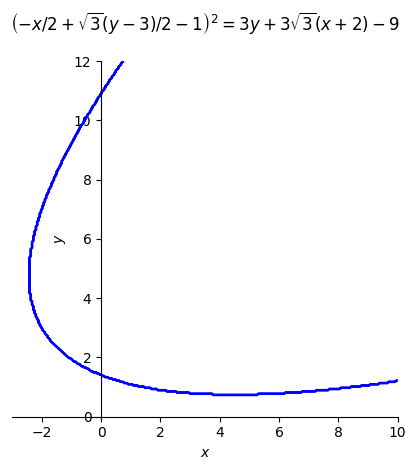

In [ ]:
eq6_subs= eq6.subs({x0: -2, y0: 3, p: 3, alpha: Pi/6})
p0 = plot_implicit(eq6_subs,
                   (x, -3, 10),
                   (y, 0, 12),
                   aspect_ratio=(1, 1),
                   xlabel='$x$',
                   ylabel='$y$',
                   title=latex(eq6_subs, mode='inline') + '\n',
                   adaptive=False)

## Классы: наследование, полиморфизм методов
Создадим дочерний класс парабол Parabola, родительский класс GeometrySet.

Переменные класса - фокальный параметр $p$ (обязательная) и вершина $vertex$ (по умолчанию начало координат).

Наш класс парабол от родительского класса отличается наличием обязательной переменной $\_p$ и необязательной переменной $\_vertex$ (чтобы было ясно, что это внутренние переменные, которые явно не следует изменять, даем им имена, начинающиеся со знака $\_$).

В родительском классе для создания экземпляра класса используется метод \_\_new\_\_, поэтому мы и в дочернем классе тоже будем его использовать. В отличие от метода __init__ для инициализации уже созданного экземпляра, метод \_\_new\_\_ возвращает созданный экземпляр. Поскольку мы унаследовали класс Parabola от класса GeometrySet, то в \_\_new\_\_ класса Parabola мы можем воспользоваться методом \_\_new\_\_ класса GeometrySet.

В классе GeometrySet нет уравнения параболы, нам его нужно задать. Кроме того, определим метод draw для построения изображения параболы.

In [15]:
class Parabola(GeometryEntity):
    """A parabolic GeometryEntity."""
    def __new__(cls, p, vertex=None, **kwargs):
        if vertex is None:
            vertex = Point(0, 0)
        else:
            if len(vertex) != 2:
                raise ValueError('The vertex of "{}" must be a two dimensional point'.format(cls))
            vertex = Point(vertex, dim=2)
        return super().__new__(cls, p, vertex, **kwargs)

    def __init__(self, p, vertex=None, **kwargs):
        if vertex is None:
            vertex = Point(0, 0)
        else:
            if len(vertex) != 2:
                raise ValueError('The vertex of "{}" must be a two dimensional point'.format(cls))
            vertex = Point(vertex, dim=2)
        self._p = p
        self._vertex = vertex

    @property
    def p(self):
        return self._p

    @property
    def vertex(self):
        return self._vertex

    @p.setter
    def p(self, value):
        self._p = value

    def equation(self, x='x', y='y'):
        x0, y0 = self.vertex
        x = S(x) - x0
        y = S(y) - y0
        return Eq(y ** 2, 2 * self.p * x)

    def draw(self, **kwargs):
        equ = self.equation()
        if 'show' in kwargs and kwargs['show']:
            plot_implicit(equ, **kwargs)
        return plot_implicit(equ, **kwargs)

**Протестируем наш класс парабол.**

Создадим параболу с вершиной в точке $(-3, -2)$, изобразим ее график и выведем на экран значения ее переменных $p$ и $vertex$.

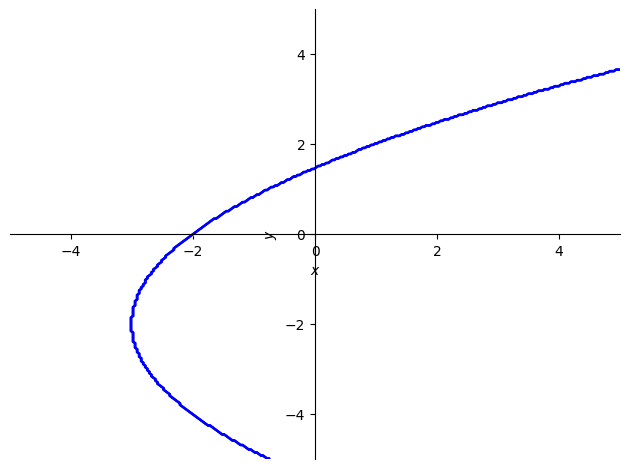

(Parabola(2, Point2D(-3, -2)), 2, Point2D(-3, -2))

In [16]:
par1 = Parabola(2, (-3, -2))
par1.draw(adaptive=False)
par1, par1.p, par1.vertex

В нашем классе есть специальный метод для изменения фокального параметра параболы, при его описании использован декоратор @p.setter. После строки с декоратором идет описание метода, изменяющего значение внутренней переменной _p, все это позволяет изменить построенную ранее параболу par1 таким образом, что новое значение фокального параметра будет таким, как мы сейчас зададим, а именно $1 / 3$.

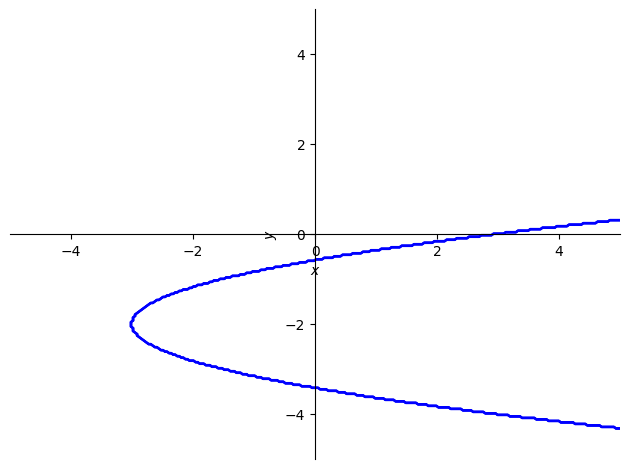

(Parabola(2, Point2D(-3, -2)), 1/3)

In [17]:
par1.p = S(1) / 3
par1.draw(adaptive=False)
par1, par1.p

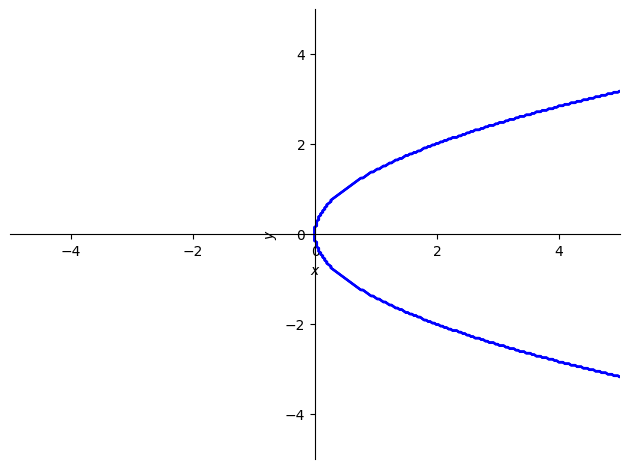

<IPython.core.display.Latex object>

In [18]:
par2 = Parabola(1)
par2.draw(adaptive=False)
display(Latex("""par2\ {},\ par2.p={},\ par2.vertex\ {},\
 par2.equation\ {}""".format(*map(latex,
                                  (par2, par2.p,
                                   par2.vertex,
                                   par2.equation(x='u', y='v'))))))